In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load the data 
amzn_df = pd.read_csv('AMZN_14_22.csv')

In [3]:
amzn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
1,2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2,2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
3,2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
4,2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


In [4]:
#Inspect it 
print(amzn_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2014-01-02   19.940001   19.968000   19.701000   19.898500   19.898500   
1     2014-01-03   19.914499   20.135500   19.811001   19.822001   19.822001   
2     2014-01-06   19.792500   19.850000   19.421000   19.681499   19.681499   
3     2014-01-07   19.752001   19.923500   19.714500   19.901501   19.901501   
4     2014-01-08   19.923500   20.150000   19.802000   20.096001   20.096001   
...          ...         ...         ...         ...         ...         ...   
2169  2022-08-15  142.800003  143.759995  141.490005  143.179993  143.179993   
2170  2022-08-16  143.910004  146.570007  142.000000  144.779999  144.779999   
2171  2022-08-17  142.690002  143.380005  140.779999  142.100006  142.100006   
2172  2022-08-18  141.320007  142.770004  140.380005  142.300003  142.300003   
2173  2022-08-19  140.470001  141.110001  137.910004  138.229996  138.229996   

        Volume  
0     42756000  
1    

In [5]:
#print the summary 
print(amzn_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2174.000000  2174.000000  2174.000000  2174.000000  2174.000000   
mean     79.225588    80.108009    78.241598    79.189630    79.189630   
std      52.956121    53.598411    52.238941    52.902640    52.902640   
min      14.220000    14.521000    14.200000    14.347500    14.347500   
25%      31.904250    32.308751    31.369500    31.788000    31.788000   
50%      77.074749    77.954750    75.480247    76.701504    76.701504   
75%     117.067497   119.025374   115.342375   116.446749   116.446749   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume  
count  2.174000e+03  
mean   8.302917e+07  
std    4.299692e+07  
min    1.762600e+07  
25%    5.561950e+07  
50%    7.138700e+07  
75%    9.668550e+07  
max    4.771220e+08  


In [7]:
#now prep the data for 2014-2019
amzn_df.set_index(pd.DatetimeIndex(amzn_df['Date']), inplace=True)

In [8]:
#Keep the close for 2014-19
amzn_df = amzn_df[['Close']]

In [9]:
print(amzn_df)

                 Close
Date                  
2014-01-02   19.898500
2014-01-03   19.822001
2014-01-06   19.681499
2014-01-07   19.901501
2014-01-08   20.096001
...                ...
2022-08-15  143.179993
2022-08-16  144.779999
2022-08-17  142.100006
2022-08-18  142.300003
2022-08-19  138.229996

[2174 rows x 1 columns]


In [10]:
print (amzn_df.index.max())

2022-08-19 00:00:00


In [12]:


data= amzn_df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len =math.ceil(len(dataset) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#60 = number of days 
# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [13]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

2022-08-24 18:00:19.147442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Comple the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

22/22 [==============================] - 13s 443ms/step - loss: 0.0264


In [16]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


21/21 [==============================] - 5s 202ms/step


In [17]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [18]:
print(rmse)

30.224387217174566


In [19]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


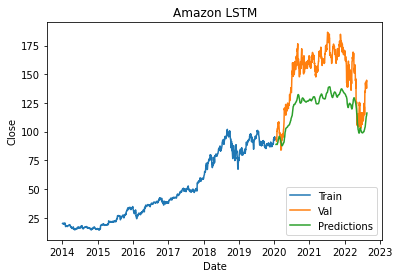

In [27]:
#Predict and visualize 

train = amzn_df[:training_data_len]

valid = amzn_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Amazon LSTM')

plt.xlabel('Date')

plt.ylabel('Close')

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


<AxesSubplot:xlabel='Date'>

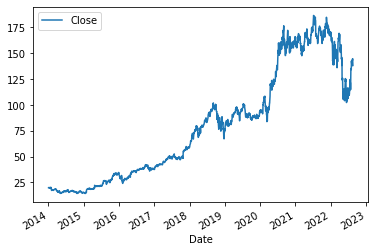

In [21]:
amzn_df.plot()

In [22]:
train['Close']

Date
2014-01-02    19.898500
2014-01-03    19.822001
2014-01-06    19.681499
2014-01-07    19.901501
2014-01-08    20.096001
                ...    
2020-01-13    94.565002
2020-01-14    93.472000
2020-01-15    93.100998
2020-01-16    93.897003
2020-01-17    93.236000
Name: Close, Length: 1522, dtype: float64

In [23]:
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2020-01-21,94.599998,88.892830
2020-01-22,94.373001,88.933487
2020-01-23,94.228996,88.973618
2020-01-24,93.082001,89.008873
2020-01-27,91.417000,89.011177
...,...,...
2022-08-15,143.179993,113.754486
2022-08-16,144.779999,114.476181
2022-08-17,142.100006,115.163597


In [24]:
complete_df = pd.concat([train[['Close']], valid[['Close', 'Predictions']]])
complete_df

,Close,Predictions
Date,,
2014-01-02,19.898500,NaN
2014-01-03,19.822001,NaN
2014-01-06,19.681499,NaN
2014-01-07,19.901501,NaN
2014-01-08,20.096001,NaN
...,...,...
2022-08-15,143.179993,113.754486
2022-08-16,144.779999,114.476181
2022-08-17,142.100006,115.163597


In [25]:
complete_df2 = complete_df.dropna()

print(complete_df2)

                 Close  Predictions
Date                               
2020-01-21   94.599998    88.892830
2020-01-22   94.373001    88.933487
2020-01-23   94.228996    88.973618
2020-01-24   93.082001    89.008873
2020-01-27   91.417000    89.011177
...                ...          ...
2022-08-15  143.179993   113.754486
2022-08-16  144.779999   114.476181
2022-08-17  142.100006   115.163597
2022-08-18  142.300003   115.731857
2022-08-19  138.229996   116.204903

[652 rows x 2 columns]


In [26]:
complete_df2.to_csv('AP_AMZN.csv', index=False)